In [2]:
# 18.05.2024
# обновлена схема, построены графики для пилотного сигнала

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
%matplotlib widget

### Сравнение метрик для ZF и MMSE

In [3]:
metrics = pd.read_csv('comparison_metrics.txt', sep=',', index_col=False, header=0, skipinitialspace=True)

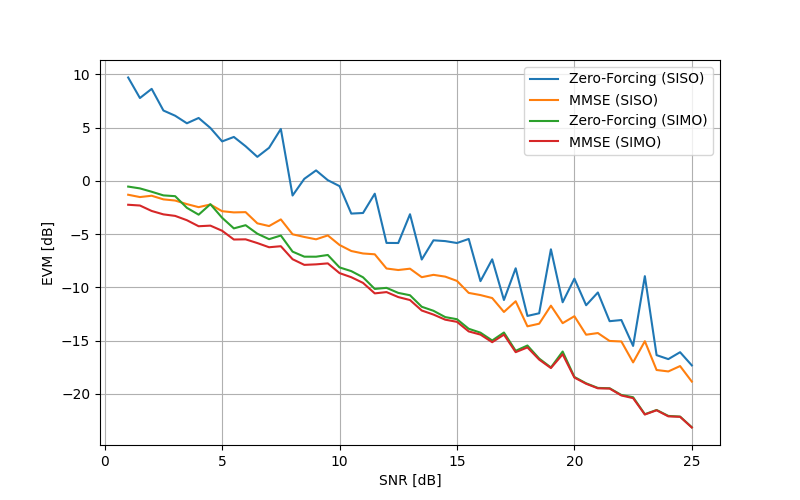

In [4]:
fig1 = plt.figure(figsize=(8,5))
ax_1 = fig1.add_subplot(111)
ax_1.plot(metrics['SNR_dB'], 20*np.log10(metrics['EVM_ZF_SISO']), label='Zero-Forcing (SISO)')
ax_1.plot(metrics['SNR_dB'], 20*np.log10(metrics['EVM_MMSE_SISO']), label='MMSE (SISO)')
ax_1.plot(metrics['SNR_dB'], 20*np.log10(metrics['EVM_ZF_SIMO']), label='Zero-Forcing (SIMO)')
ax_1.plot(metrics['SNR_dB'], 20*np.log10(metrics['EVM_MMSE_SIMO']), label='MMSE (SIMO)')
ax_1.set_ylabel("EVM [dB]")
ax_1.set_xlabel("SNR [dB]")
ax_1.legend() # bbox_to_anchor=(0.65, 0.8)
ax_1.grid()
#ax_1.set_title('Real part')
#fig1.suptitle('Information points on constellation diagram')
plt.show()

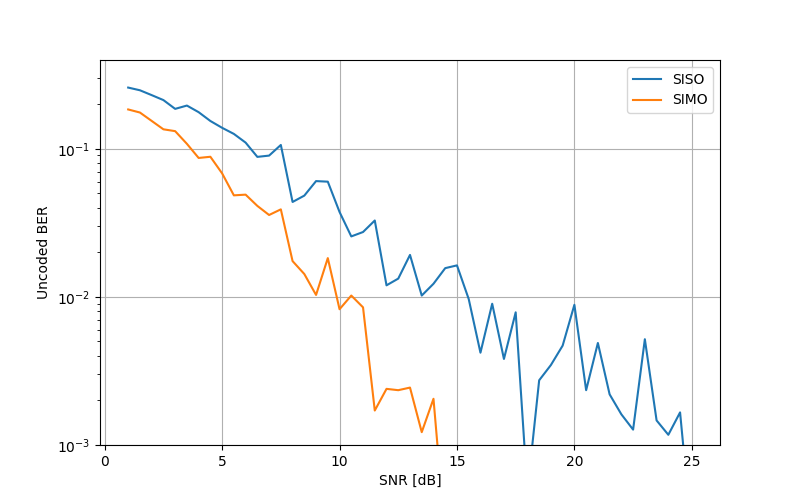

In [5]:
fig2 = plt.figure(figsize=(8,5))
ax_1 = fig2.add_subplot(111)
ax_1.plot(metrics['SNR_dB'], metrics['BER_ZF_SISO'], label='SISO')
ax_1.plot(metrics['SNR_dB'], metrics['BER_ZF_SIMO'], label='SIMO')
ax_1.set_ylabel("Uncoded BER")
ax_1.set_xlabel("SNR [dB]")
ax_1.set_yscale('log')
ax_1.set_ylim(bottom=10**(-3))
ax_1.legend()
ax_1.grid()
#ax_1.set_title('Real part')
#fig2.suptitle('Information points on constellation diagram')
plt.show()

### Канал SIMO

In [6]:
h11 = pd.read_csv('h11.txt', sep=',', header=None, names=['re', 'im'])
h21 = pd.read_csv('h21.txt', sep=',', header=None, names=['re', 'im'])

In [7]:
Bw = 20*1e6
delta_t = 1/Bw

In [8]:
h11.loc[5]={'re':0, 'im':0}
h21

,re,im
0,-0.718894,-0.089375
1,-0.215299,0.520331
2,0.000000,0.000000
3,0.087847,-0.077286
4,0.000000,0.000000
5,-0.117236,-0.177493


In [9]:
h21.shape

(6, 2)

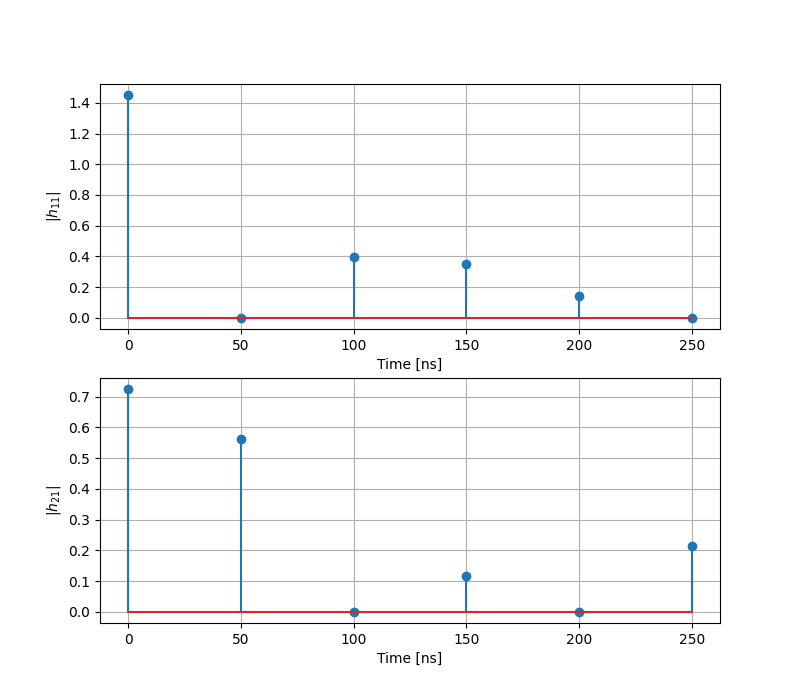

In [10]:
fig3 = plt.figure(figsize=(8,7))
ax_1 = fig3.add_subplot(211)
ax_1.stem(np.arange(0, h11.shape[0])*delta_t*1e9, np.sqrt(h11['re']**2+h11['im']**2))
ax_1.set_ylabel(r"$|h_{11}|$")
ax_1.set_xlabel("Time [ns]")
ax_1.grid()

ax_2 = fig3.add_subplot(212)
ax_2.stem(np.arange(0, h21.shape[0])*delta_t*1e9, np.sqrt(h21['re']**2+h21['im']**2))
ax_2.set_ylabel(r"$|h_{21}|$")
ax_2.set_xlabel("Time [ns]")
ax_2.grid()

plt.show()

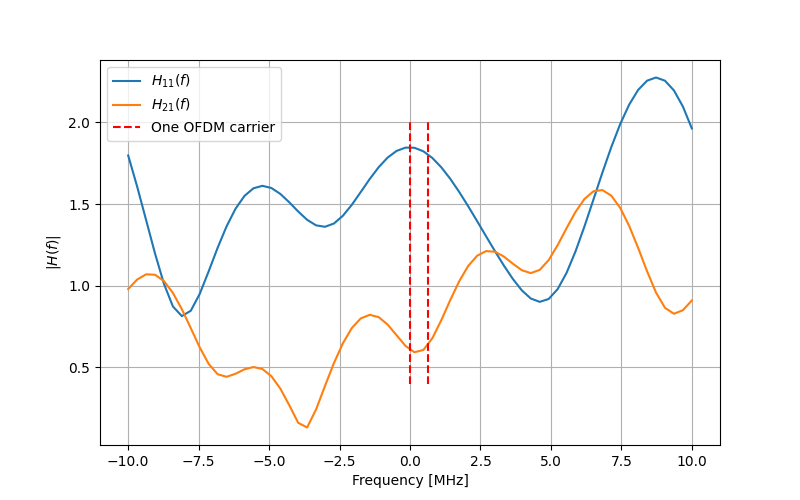

In [19]:
fig3 = plt.figure(figsize=(8,5))
ax_1 = fig3.add_subplot(111)
ax_1.plot(np.linspace(-10, 10, 64), np.abs(np.fft.fft(h11['re']+1j*h11['im'], n=64)), label=r'$H_{11}(f)$')
ax_1.plot(np.linspace(-10, 10, 64), np.abs(np.fft.fft(h21['re']+1j*h21['im'], n=64)), label=r'$H_{21}(f)$')
ax_1.plot([0, 0], [0.4, 2], '--r', label='One OFDM carrier')
ax_1.plot([2*20/64, 2*20/64], [0.4, 2], '--r')
ax_1.set_ylabel(r"$|H(f)|$")
ax_1.set_xlabel("Frequency [MHz]")
ax_1.grid()
ax_1.legend()

plt.show()

In [18]:
20/64*2

0.625